In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import make_scorer, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
data = pd.read_csv('./Data/Clean_data.csv')

In [8]:
data['Locality'] = data['Locality'].astype('str')
data['Fully equipped kitchen'] = data['Fully equipped kitchen'].astype('str')
data['Fireplace'] = data['Fireplace'].astype('str')
data['Terrace'] = data['Terrace'].astype('str')
data['Garden'] = data['Garden'].astype('str')
data['Swimming pool'] = data['Swimming pool'].astype('str')
data['Furnished'] = data['Furnished'].astype('str')
data['Number of rooms'] = data['Number of rooms'].astype('int64')
data['Number of facades'] = data['Number of facades'].astype('int64')

In [5]:
data.head()

,Unnamed: 0,id,Locality,Type of property,Subtype of property,Type of sale,Fully equipped kitchen,Fireplace,Terrace,Garden,...,Surface area of the plot of land,Swimming pool,State of the building,Compound Listing,Price,Number of rooms,Living Area,Furnished,Terrace area,Number of facades
0,0,20320744,1150,APARTMENT,APARTMENT,residential_sale,1,0,1,1,...,0.0,0,GOOD,single,575000.0,3,160.0,0.0,40.0,3
1,1,20317718,9000,APARTMENT,APARTMENT,residential_sale,1,0,1,0,...,0.0,0,AS_NEW,compound,390000.0,3,96.0,0.0,29.0,2
2,2,20315842,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,...,0.0,0,GOOD,compound,260000.0,1,76.0,0.0,12.0,3
3,3,20315799,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,...,0.0,0,GOOD,compound,325000.0,1,81.0,0.0,13.0,3
4,4,20315776,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,...,0.0,0,GOOD,compound,365000.0,3,101.0,0.0,13.0,3


In [9]:
data_insee = pd.read_csv('./Data/INSEE_PostCode.csv', encoding='latin-1')

In [10]:
subset_columns = data_insee.columns[6:]

data_insee["PostalCodes"] = data_insee[subset_columns].apply(lambda row: row.dropna().tolist(), axis=1)

In [280]:
data_insee

,Code INS,Entités administratives,Langue,Région,Province,Arrondissement,Codes postaux,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,PostalCodes
0,11001,Aartselaar,N,RÉGION FLAMANDE,Province d'Anvers,Arrondissement d'Anvers,2630,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2630.0]
1,11002,Anvers,N,RÉGION FLAMANDE,Province d'Anvers,Arrondissement d'Anvers,2000,2018.0,2020.0,2030.0,...,2100.0,2180.0,2600.0,2610.0,2660.0,NaN,NaN,NaN,NaN,"[2000.0, 2018.0, 2020.0, 2030.0, 2040.0, 2050...."
2,11004,Boechout,N,RÉGION FLAMANDE,Province d'Anvers,Arrondissement d'Anvers,2530,2531.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2530.0, 2531.0]"
3,11005,Boom,N,RÉGION FLAMANDE,Province d'Anvers,Arrondissement d'Anvers,2850,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2850.0]
4,11007,Borsbeek,N,RÉGION FLAMANDE,Province d'Anvers,Arrondissement d'Anvers,2150,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2150.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,93014,Couvin,F,RÉGION WALLONNE,Province de Namur,Arrondissement de Philippeville,5660,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[5660.0]
584,93018,Doische,F,RÉGION WALLONNE,Province de Namur,Arrondissement de Philippeville,5680,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[5680.0]
585,93022,Florennes,F,RÉGION WALLONNE,Province de Namur,Arrondissement de Philippeville,5620,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[5620.0]
586,93056,Philippeville,F,RÉGION WALLONNE,Province de Namur,Arrondissement de Philippeville,5600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[5600.0]


In [281]:
data_insee.drop(columns= data_insee.columns[6:22], inplace= True)

In [283]:
data_fin = pd.read_csv('./Data/SPF_FIN_Stat.csv', encoding= 'latin-1')

In [151]:
data_insee.shape

(588, 7)

In [291]:
data_fin_postcode = pd.merge(data_fin, data_insee, how="inner", on="Code INS")


In [292]:
data_fin_postcode.shape

(562, 17)

In [154]:
data_fin_postcode.shape

(588, 16)

In [ ]:
data_fin_postcode.drop(columns= 'Entités administratives_x', inplace= True)

In [155]:
# Step 1: Explode the KeyList in Table 2
data_fin_postcode_exploded = data_fin_postcode.explode('PostalCodes')

data_fin_postcode_exploded['PostalCodes'] = data_fin_postcode_exploded['PostalCodes'].astype('int').astype('str')

In [160]:
data_postcodes.columns

Index(['Nombre d'habitants', 'Revenu total net imposable',
       'Revenu moyen par déclaration', 'Revenu médian par déclaration',
       'Revenu moyen par habitant', 'Indice de richesse', 'Impôt d'Etat',
       'Taxes communales et d'agglomération', 'Impôt total', 'Code INS',
       'Entités administratives_y', 'Langue', 'Région', 'Province',
       'Arrondissement', 'PostalCodes', 'Unnamed: 0', 'id', 'Locality',
       'Type of property', 'Subtype of property', 'Type of sale',
       'Fully equipped kitchen', 'Fireplace', 'Terrace', 'Garden',
       'Garden area', 'Surface of the land',
       'Surface area of the plot of land', 'Swimming pool',
       'State of the building', 'Compound Listing', 'Price', 'Number of rooms',
       'Living Area', 'Furnished', 'Terrace area', 'Number of facades', 'PC1',
       'PC2'],
      dtype='object')

In [297]:

# Step 2: Merge the exploded Table 2 with Table 1 based on the 'KeyList' and 'Key'
data_postcodes = pd.merge(data_fin_postcode_exploded, data, how='inner', left_on='PostalCodes', right_on='Locality')



In [313]:
data_postcodes['Wealth_index'] = data_postcodes['Wealth_index'].astype(float)

In [314]:
data_postcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10278 entries, 0 to 10277
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   N_Inhabitants                     10278 non-null  int32  
 1   Tot_taxable_income                10278 non-null  float64
 2   Mean_income_taxunit               10278 non-null  float64
 3   Median_income_taxunit             10278 non-null  float64
 4   Mean_income_inhabitant            10278 non-null  float64
 5   Wealth_index                      10278 non-null  float64
 6   State_tax                         10278 non-null  float64
 7   Local_tax                         10278 non-null  float64
 8   Tot_tax                           10278 non-null  float64
 9   Locality                          10278 non-null  object 
 10  Language                          10278 non-null  object 
 11  Region                            10278 non-null  object 
 12  Prov

In [163]:
missing = data_postcodes[data_postcodes['Nombre d\'habitants'].isna()]

In [168]:
missing[['PostalCodes','Locality', 'Code INS']]

,PostalCodes,Locality,Code INS
2,NaN,9051,NaN
3,NaN,9051,NaN
4,NaN,9051,NaN
5,NaN,9051,NaN
33,NaN,9051,NaN
...,...,...,...
10933,7850,7850,55010.0
10938,NaN,4032,NaN
10958,9930,9930,44080.0
10959,9950,9950,44072.0


In [169]:
import missingno

In [177]:
sorted = data_postcodes.sort_values(by= ["Nombre d'habitants", 'Code INS'])


<Axes: >

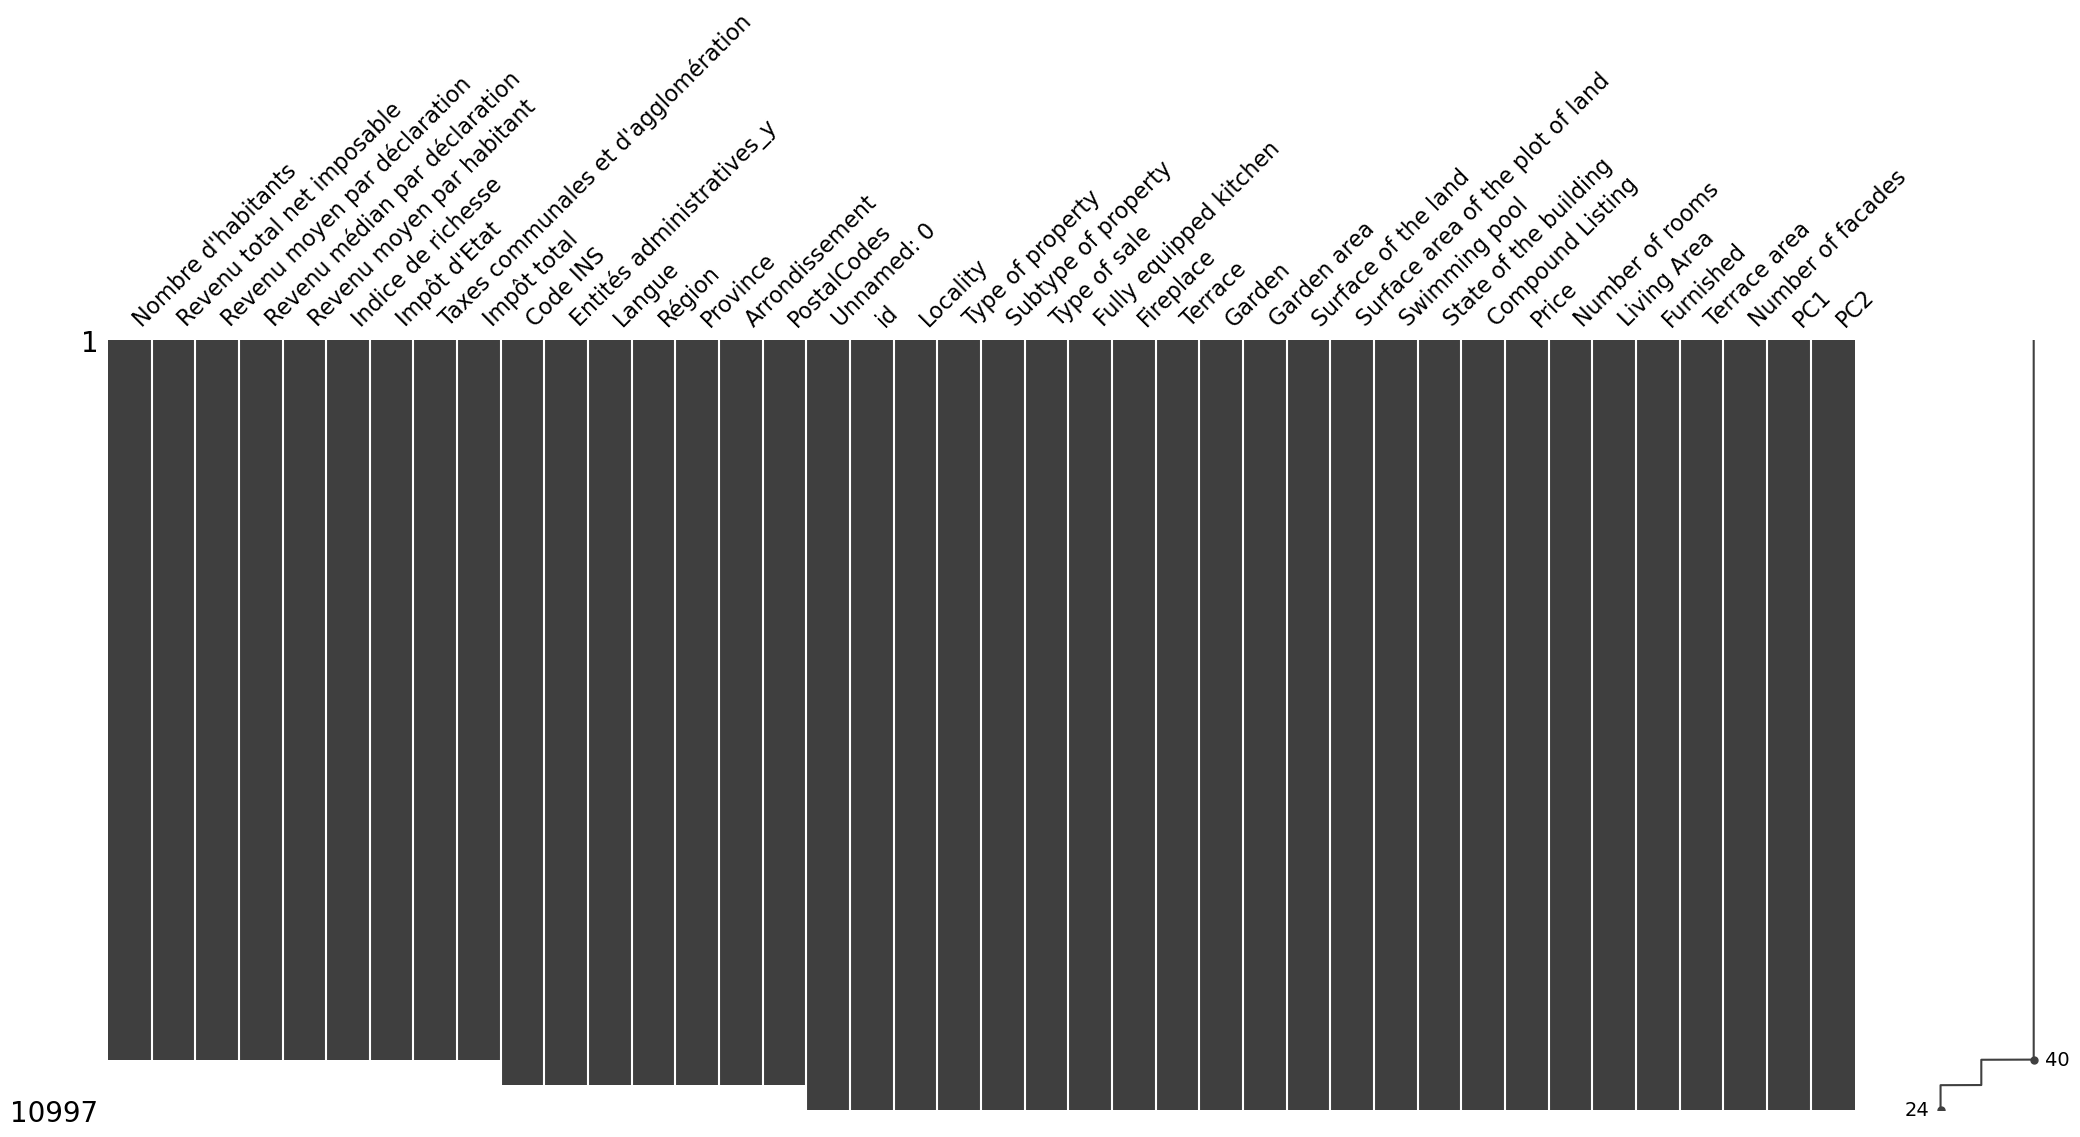

In [178]:
missingno.matrix(sorted)

In [ ]:
columns = ["Nombre d'habitants", 'Revenu total net imposable',
       'Revenu moyen par déclaration', 'Revenu médian par déclaration',
       'Revenu moyen par habitant', 'Indice de richesse', "Impôt d'Etat",
       "Taxes communales et d'agglomération", 'Impôt total', "Price"]


["Nombre d'habitants",
 'Revenu total net imposable',
 'Revenu moyen par déclaration',
 'Revenu médian par déclaration',
 'Revenu moyen par habitant',
 'Indice de richesse',
 "Impôt d'Etat",
 "Taxes communales et d'agglomération",
 'Impôt total',
 'Price']

In [212]:
new_data = data_post_cleaned[columns]

In [186]:
data_post_cleaned = data_postcodes.dropna(subset=["Nombre d'habitants"])

In [232]:
columns_to_convert = ["Nombre d'habitants", "Revenu total net imposable", "Impôt d'Etat", "Taxes communales et d'agglomération", "Impôt total"]
new_data[columns_to_convert] = new_data[columns_to_convert].apply(lambda col: col.str.replace('.', '', regex=False)).astype(float)


AttributeError: Can only use .str accessor with string values!

In [233]:
data_post_cleaned[columns_to_convert] = data_post_cleaned[columns_to_convert].apply(lambda col: col.str.replace('.', '', regex=False)).astype(float)

C:\Users\kvnpo\AppData\Local\Temp\ipykernel_30032\1411815028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_post_cleaned[columns_to_convert] = data_post_cleaned[columns_to_convert].apply(lambda col: col.str.replace('.', '', regex=False)).astype(float)


In [249]:
data_post_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10278 entries, 0 to 10996
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nombre d'habitants                   10278 non-null  float64
 1   Revenu total net imposable           10278 non-null  float64
 2   Revenu moyen par déclaration         10278 non-null  float64
 3   Revenu médian par déclaration        10278 non-null  float64
 4   Revenu moyen par habitant            10278 non-null  float64
 5   Indice de richesse                   10278 non-null  float64
 6   Impôt d'Etat                         10278 non-null  float64
 7   Taxes communales et d'agglomération  10278 non-null  float64
 8   Impôt total                          10278 non-null  float64
 9   Code INS                             10278 non-null  float64
 10  Entités administratives_y            10278 non-null  object 
 11  Langue                           

In [323]:
data_postcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10278 entries, 0 to 10277
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   N_Inhabitants                     10278 non-null  int32  
 1   Tot_taxable_income                10278 non-null  float64
 2   Mean_income_taxunit               10278 non-null  float64
 3   Median_income_taxunit             10278 non-null  float64
 4   Mean_income_inhabitant            10278 non-null  float64
 5   Wealth_index                      10278 non-null  float64
 6   State_tax                         10278 non-null  float64
 7   Local_tax                         10278 non-null  float64
 8   Tot_tax                           10278 non-null  float64
 9   Locality                          10278 non-null  object 
 10  Language                          10278 non-null  object 
 11  Region                            10278 non-null  object 
 12  Prov

In [327]:
data_numer_post = data_postcodes[['N_Inhabitants', 'Tot_taxable_income', 'Mean_income_taxunit', 'Median_income_taxunit', 'Mean_income_inhabitant', 'Wealth_index', 'State_tax', 'Local_tax', 'Tot_tax', 'Price']]
data_numer_post_prop = data_postcodes[['Garden area', 'Surface of the land', 'Surface area of the plot of land', 'Price', 'Number of rooms', 'Living Area', 'Terrace area', 'Number of facades']]

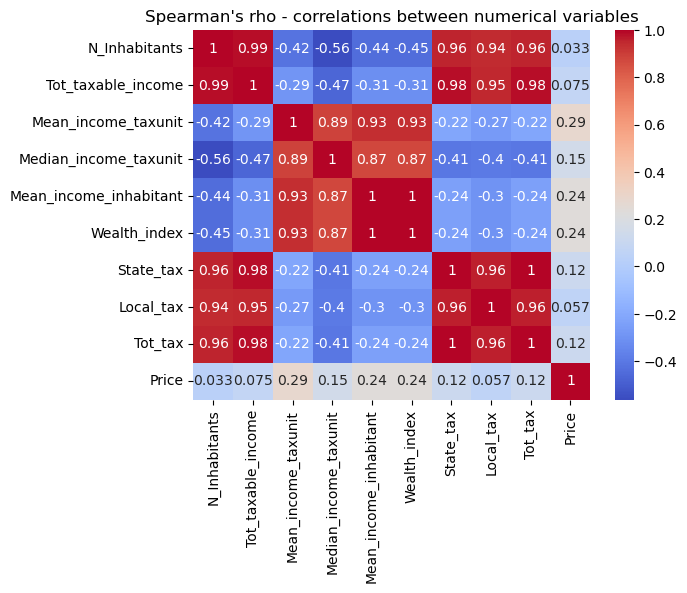

In [328]:
correlations = data_numer_post.corr(method= 'spearman')
sns.heatmap(correlations, annot= True, cmap= 'coolwarm')

plt.title("Spearman's rho - correlations between numerical variables")

plt.show()

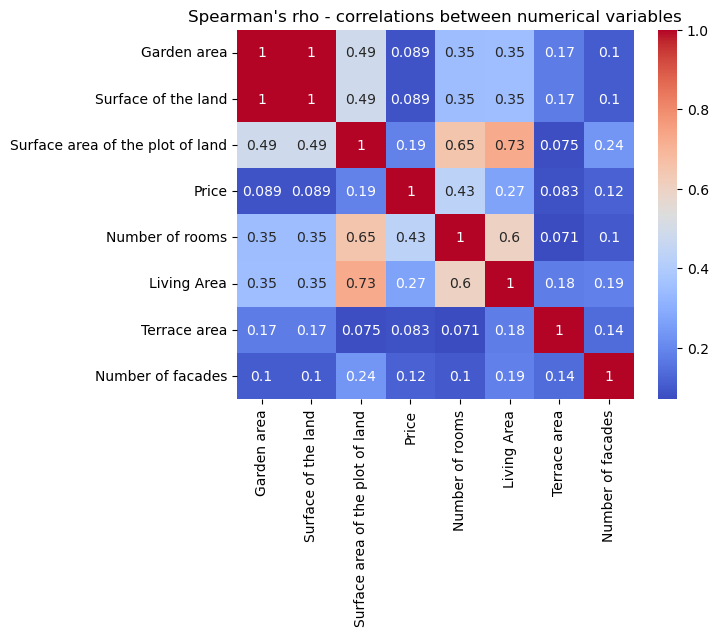

In [330]:
correlations = data_numer_post_prop.corr(method= 'spearman')
sns.heatmap(correlations, annot= True, cmap= 'coolwarm')

plt.title("Spearman's rho - correlations between numerical variables")

plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10997 entries, 0 to 10996
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10997 non-null  int64  
 1   id                                10997 non-null  int64  
 2   Locality                          10997 non-null  object 
 3   Type of property                  10997 non-null  object 
 4   Subtype of property               10997 non-null  object 
 5   Type of sale                      10997 non-null  object 
 6   Fully equipped kitchen            10997 non-null  object 
 7   Fireplace                         10997 non-null  object 
 8   Terrace                           10997 non-null  object 
 9   Garden                            10997 non-null  object 
 10  Garden area                       10997 non-null  float64
 11  Surface of the land               10997 non-null  float64
 12  Surf

In [229]:
numerical_predictors = ['Surface area of the plot of land',
 'Number of rooms',
 'Living Area',
 'Number of facades']

data_numerical = new_data[numerical_predictors]
data_numerical['Price'] = new_data['Price']

KeyError: "None of [Index(['Surface area of the plot of land', 'Number of rooms', 'Living Area',\n       'Number of facades'],\n      dtype='object')] are in the [columns]"

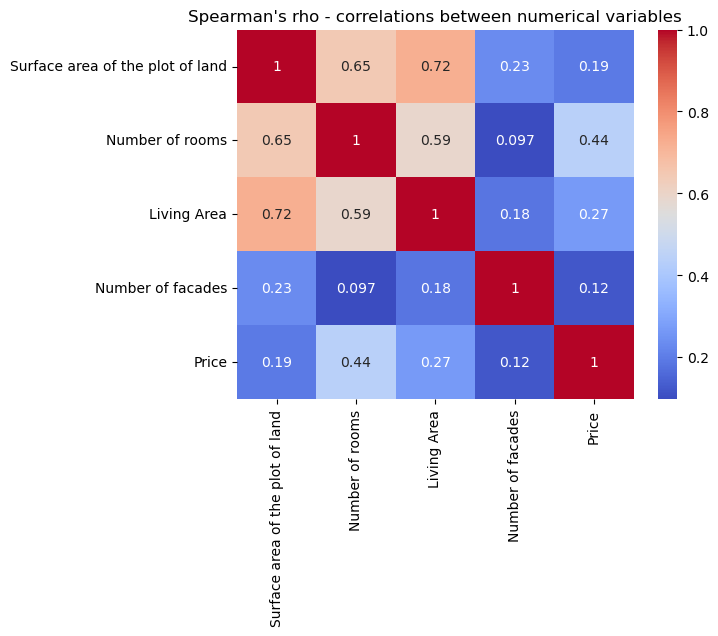

In [8]:
correlations = data_numerical.corr(method= 'spearman')
sns.heatmap(correlations, annot= True, cmap= 'coolwarm')

plt.title("Spearman's rho - correlations between numerical variables")

plt.show()

In [ ]:
X = data_numerical
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif)

                            Feature       VIF
0  Surface area of the plot of land  1.249584
1                   Number of rooms  8.826499
2                       Living Area  7.712060
3                 Number of facades  6.563876
4                             Price  8.171513


In [ ]:
data_numerical_pred = data_numerical.drop(columns=['Price'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numerical_pred)

# Perform PCA

pca = PCA()
pca.fit(scaled_data)

# Create Broken stick model to visually assess how many components to extract


def broken_stick(n_components, total_components):
    """Calculate broken-stick model values for n_components."""
    return [np.sum([1 / k for k in range(i, total_components + 1)]) / total_components for i in range(1, n_components + 1)]

n_components = len(pca.explained_variance_ratio_)

if data_numerical_pred.shape[0] <= data_numerical_pred.shape[1]:
    total_components = data_numerical_pred.shape[0] - 1
else:
    total_components = data_numerical_pred.shape[1]

broken_stick_values = broken_stick(n_components, total_components)

# Step 5: Create a DataFrame for Comparison
explained_variance = pca.explained_variance_ratio_
comparison_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(n_components)],
    'Explained Variance': explained_variance,
    'Broken-Stick Value': broken_stick_values
})

# Step 6: Plot Results
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), explained_variance, 'o-', label='Observed Variance')
plt.plot(range(1, n_components + 1), broken_stick_values, 'o-', label='Broken-Stick Model')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Broken Stick Model vs Observed Eigenvalues')
plt.legend()
plt.grid()
plt.show()

# Print components that exceed broken stick model
print("\
Components exceeding broken stick model:")
for i in range(n_components):
    if pca.explained_variance_ratio_[i] > broken_stick_values[i]:
        print(f"PC{i+1}: Observed = {pca.explained_variance_ratio_[i]:.3f}, Broken Stick = {broken_stick_values[i]:.3f}")


NameError: name 'data_numerical' is not defined

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': np.cumsum(explained_variance_ratio)
})

explained_variance_df.to_excel('./Results-Graphs/PCA_totalData_AllPred_ExplainedVariance.xlsx', index= False)
explained_variance_df

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.511447,0.511447
1,PC2,0.244929,0.756376
2,PC3,0.159110,0.915486
3,PC4,0.084514,1.000000


In [12]:
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
                        columns=[f'PC{i+1}' for i in range(len(numerical_predictors))],
                         index = numerical_predictors )

loadings.to_excel('./Results-Graphs/PCA_totalData_AllPred_Loadings.xlsx', index= True)
loadings

,PC1,PC2,PC3,PC4
Surface area of the plot of land,0.702672,0.283848,0.648349,-0.073597
Number of rooms,0.791214,-0.418574,-0.229444,-0.382390
Living Area,0.854184,-0.265413,-0.120471,0.430701
Number of facades,0.443370,0.808447,-0.385983,-0.030743


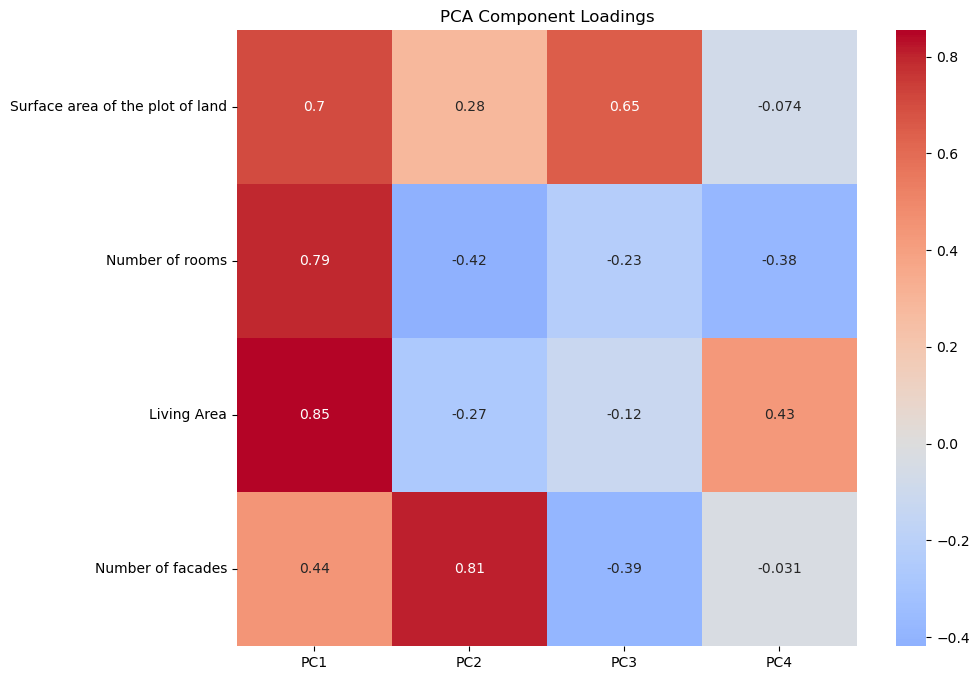

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

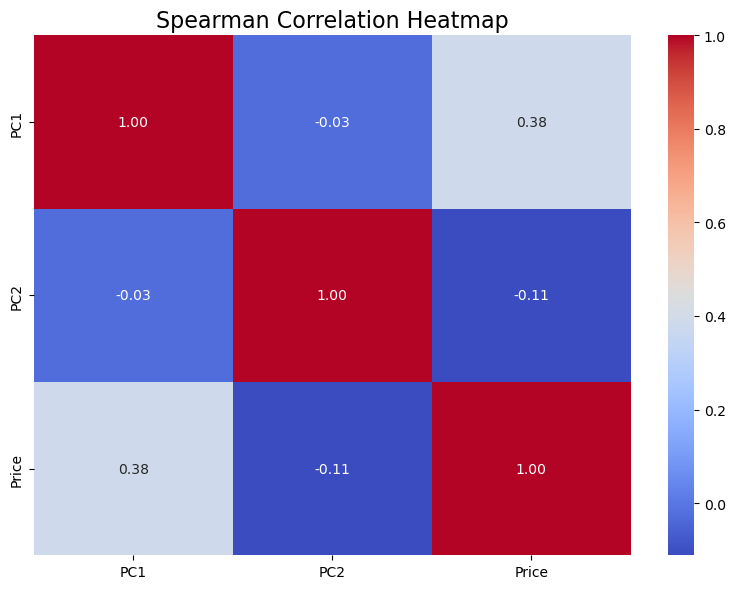

In [8]:
# Look at correlations between response variable Price and PCs

pca = PCA(n_components=2)
scores = pca.fit_transform(scaled_data)

# Create a DataFrame for the first two principal components
scores_df = pd.DataFrame(scores, columns=["PC1", "PC2"])

# Add the response variable to the DataFrame
scores_df["Price"] = data['Price']

# Calculate Spearman correlation
correlation_matrix = scores_df.corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
data['PC1'] = scores_df['PC1']
data['PC2'] = scores_df['PC2']

In [235]:
data_post_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10278 entries, 0 to 10996
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nombre d'habitants                   10278 non-null  float64
 1   Revenu total net imposable           10278 non-null  float64
 2   Revenu moyen par déclaration         10278 non-null  float64
 3   Revenu médian par déclaration        10278 non-null  float64
 4   Revenu moyen par habitant            10278 non-null  float64
 5   Indice de richesse                   10278 non-null  float64
 6   Impôt d'Etat                         10278 non-null  float64
 7   Taxes communales et d'agglomération  10278 non-null  float64
 8   Impôt total                          10278 non-null  float64
 9   Code INS                             10278 non-null  float64
 10  Entités administratives_y            10278 non-null  object 
 11  Langue                           

In [10]:
data_modelling = pd.DataFrame()
data_modelling['Locality'] = data['Locality']
data_modelling['prop_subtype'] = data['Subtype of property']
data_modelling['build_state'] = data['State of the building']
data_modelling['PC1'] = data['PC1']
data_modelling['PC2'] = data['PC2']

In [251]:
data_post_cleaned_modelling = pd.DataFrame()
data_post_cleaned_modelling["Revenu moyen par déclaration"] = data_post_cleaned["Revenu moyen par déclaration"]
data_post_cleaned_modelling['Subtype of property'] = data_post_cleaned["Subtype of property"]
data_post_cleaned_modelling["State of the building"] = data_post_cleaned["State of the building"]
data_post_cleaned_modelling["PC1"] = data_post_cleaned["PC1"]
data_post_cleaned_modelling["PC2"] =data_post_cleaned["PC2"]

In [11]:
data_modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10997 entries, 0 to 10996
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Locality      10997 non-null  object 
 1   prop_subtype  10997 non-null  object 
 2   build_state   10997 non-null  object 
 3   PC1           10997 non-null  float64
 4   PC2           10997 non-null  float64
dtypes: float64(2), object(3)
memory usage: 429.7+ KB


In [47]:
from gower import gower_matrix
type(data_modelling)

pandas.core.frame.DataFrame

In [49]:
gowermat = gower_matrix(data_modelling.values)

In [253]:
gowermat_post = gower_matrix(data_post_cleaned_modelling.values)

In [51]:
gowermat.shape

(10997, 10997)

In [254]:
gowermat_post.shape

(10278, 10278)

In [52]:
# Total number of points (matrix size is 10997 x 10997)
n_points = 10997

seed = 42
np.random.seed(seed)

# Fraction of points to select
train_fraction = 0.8

# Generate all possible indices
all_indices = np.arange(n_points)

# Randomly shuffle the indices
np.random.shuffle(all_indices)

# Select 80% of the indices for training
n_train = int(train_fraction * n_points)
train_indices = all_indices[:n_train]

# The remaining 20% are for testing
test_indices = all_indices[n_train:]

In [255]:
# Total number of points (matrix size is 10997 x 10997)
n_points = 10278

seed = 42
np.random.seed(seed)

# Fraction of points to select
train_fraction = 0.8

# Generate all possible indices
all_indices_post = np.arange(n_points)

# Randomly shuffle the indices
np.random.shuffle(all_indices_post)

# Select 80% of the indices for training
n_train_post = int(train_fraction * n_points)
train_indices_post = all_indices_post[:n_train_post]

# The remaining 20% are for testing
test_indices_post = all_indices_post[n_train_post:]

In [258]:
y_post = data_post_cleaned['Price'].values
y_train_post = y_post[train_indices_post]
y_test_post = y_post[test_indices_post]

In [53]:
D = gowermat[:, train_indices]
D_train, D_test = D[train_indices], D[test_indices]

In [267]:
D_post = gowermat_post[:, train_indices_post]
D_train_post, D_test_port = D_post[train_indices_post], D_post[test_indices_post]

In [269]:
D_train_post.shape

(8222, 8222)

In [64]:
knn = KNeighborsRegressor(metric= 'precomputed', n_neighbors= 18, weights= 'distance')
knn.fit(D_train, y_train)

KNeighborsRegressor(metric='precomputed', n_neighbors=18, weights='distance')

In [74]:
y_pred=knn.predict(D_test) 

rmse = RMSE(y_test, y_pred)

rmse

110044.08358674501

In [72]:
MAE(y_test, y_pred)

77547.75685257818

In [76]:
MAPE(y_test, y_pred)

0.23739081160320427

In [73]:
r2 = r2_score(y_test, y_pred)
r2


0.5181447624835382

In [68]:
1 - (1 - r2) * (10997 - 5) / (10997 - 5 - 1)

0.5181009215921255

In [80]:
result = pd.DataFrame([y_test, y_pred, y_test-y_pred])

In [91]:
param_grid = {'n_neighbors': list(range(1,25)),
              'weights': ['uniform', 'distance']
              }

knn = KNeighborsRegressor(metric= 'precomputed')
grid = GridSearchCV(estimator= knn,
                    param_grid= param_grid,
                    cv=5,
                    scoring= {'RMSE': 'neg_root_mean_squared_error',
                              'Adj R2': adjusted_r2_scorer},
                    refit= 'RMSE',
                    verbose=1)

grid_search=grid.fit(D_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'n_neighbors': 21, 'weights': 'distance'}
-109256.46933364295


In [270]:
param_grid = {'n_neighbors': list(range(1,25)),
              'weights': ['uniform', 'distance']
              }

knn = KNeighborsRegressor(metric= 'precomputed')
grid = GridSearchCV(estimator= knn,
                    param_grid= param_grid,
                    cv=5,
                    scoring= {'RMSE': 'neg_root_mean_squared_error',
                              'Adj R2': adjusted_r2_scorer},
                    refit= 'RMSE',
                    verbose=1)

grid_search=grid.fit(D_train_post, y_train_post)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'n_neighbors': 24, 'weights': 'distance'}
-113623.79594671012


In [93]:
y_pred=best_model.predict(D_test) 

rmse = RMSE(y_test, y_pred)

rmse

110607.47437036484

In [271]:
y_pred_post=best_model.predict(D_test_port) 

rmse = RMSE(y_test_post, y_pred_post)

rmse

112457.05809437245

In [94]:
MAE(y_test, y_pred)

77908.25516730497

In [272]:
MAE(y_test_post, y_pred_post)

79987.69221574352

In [95]:
r2 = r2_score(y_test, y_pred)
r2

0.5131982407210924

In [273]:
r2 = r2_score(y_test_post, y_pred_post)
r2

0.5072450332483078

In [19]:
data_modelling['prop_subtype_encoded'] = data_modelling['prop_subtype'].astype('category').cat.codes
data_modelling['build_state_encoded'] = data_modelling['build_state'].astype('category').cat.codes
data_modelling.columns

Index(['Locality', 'prop_subtype', 'build_state', 'PC1', 'PC2',
       'prop_subtype_encoded', 'build_state_encoded'],
      dtype='object')

In [ ]:
X = data_modelling[['Locality', 'prop_subtype_encoded', 'build_state_encoded', 'PC1', 'PC2']].values
y = data['Price'].values

(10997,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
def adjusted_r2_scorer(estimator, X, y):
    """Custom scorer for adjusted R²."""
    y_pred = estimator.predict(X)
    n = X.shape[0]  # Number of samples
    p = X.shape[1]  # Number of features
    r2 = r2_score(y, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [1]:
model_params = {'n_neighbors': list(range(1,30)),
                            'metric': ['euclidian', 'cosine'],
                            'weights': ['uniform', 'distance']}

In [3]:
type(model_params['n_neighbors']) == list

True

In [43]:
param_grid = {'n_neighbors': list(range(1,25)),
              'weights': ['uniform', 'distance']
              }

knn = KNeighborsRegressor()
grid = GridSearchCV(estimator= knn,
                    param_grid= param_grid,
                    cv=10,
                    scoring= {'RMSE': 'neg_root_mean_squared_error',
                              'Adj R2': adjusted_r2_scorer},
                    refit= 'RMSE',
                    verbose=1)

grid_search=grid.fit(X_train_scaled, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'n_neighbors': 18, 'weights': 'distance'}
-106356.19287501762


In [44]:
y_pred=best_model.predict(X_test_scaled) 

rmse = RMSE(y_test, y_pred)

rmse

102749.56160530707

In [45]:
adjusted_r2_scorer(best_model, X_test, y_test)

-0.12112196858232127

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
scaler = StandardScaler()


In [1]:
import pandas as pd

In [3]:
model = pd.read_csv('./Results-Graphs/model_metrics.csv')

In [4]:
model

,model_name,R2-Adj_train,MAE_train,RMSE_train,MAPE_train,sMAPE_train,R2-Adj_test,MAE_test,RMSE_test,MAPE_test,sMAPE_test
0,PCA on numerical property + Gower CV,106.477348,3939.327041,17973.368867,0.012388,1.176563,1.17085,80967.990424,113230.716061,0.242668,21.95852
1,PCA on numerical property + Gower CV,106.477348,3939.327041,17973.368867,0.012388,1.176563,1.17085,80967.990424,113230.716061,0.242668,21.95852
